# Julia Sets In Julia Lang

The mandelbrot and julia sets have fascinated folks since forever


The mandelbrot concerns the behavior of what are called complex quadratic polynomials.
That sounds fancy, but it's really just a function defined as:

$$ f(z) = z^{2} + c $$

For some constant c. 

Let's go ahead and define this in Julia

In [53]:
function f(z,c)
    return z^2 + c
end

f (generic function with 3 methods)

The only difference here is that we pass c in as an input to the function. Now, what we are interested in is what happens to this function under repeated iterations. That is, if we apply f(f(f(z,c))) for some z,c what will happen to the output? For convience let's describe a function f_n which will apply f to itself n times. so f_1(z) = f(z), f_2(z) = f(f(z)) etc. 

In [58]:
function f_n(n,z,c)
    n == 1 ? f(z,c) : f(f_n(n-1,z,c),c)
end

f_n (generic function with 1 method)

In [68]:
z0 = 1
c = 2

println("f($z0,$c) = $(f_n(1,z0,c)) ")
println("f(f($z0,$c)) = $(f_n(2,z0,c)) ")
println("f(f(f($z0,$c))) = $(f_n(3,z0,c)) ")
println("f(f(f(f($z0,$c)))) = $(f_n(4,z0,c)) ")

f(1,2) = 3 
f(f(1,2)) = 11 
f(f(f(1,2))) = 123 
f(f(f(f(1,2)))) = 15131 


In [69]:
z0 = .5
c = 0

println("f($z0,$c) = $(f_n(1,z0,c)) ")
println("f(f($z0,$c)) = $(f_n(2,z0,c)) ")
println("f(f(f($z0,$c))) = $(f_n(3,z0,c)) ")
println("f(f(f(f($z0,$c)))) = $(f_n(4,z0,c)) ")

f(0.5,0) = 0.25 
f(f(0.5,0)) = 0.0625 
f(f(f(0.5,0))) = 0.00390625 
f(f(f(f(0.5,0)))) = 1.52587890625e-5 


Things get a little more interesting when we use complex numbers

In [73]:
z0 = .8 + .5im
c = 0

println("f($z0,$c) = $(f_n(1,z0,c)) ")
println("f(f($z0,$c)) = $(f_n(2,z0,c)) ")
println("f(f(f($z0,$c))) = $(f_n(3,z0,c)) ")
println("f(f(f(f($z0,$c)))) = $(f_n(4,z0,c)) ")

f(0.8 + 0.5im,0) = 0.3900000000000001 + 0.8im 
f(f(0.8 + 0.5im,0)) = -0.4879 + 0.6240000000000002im 
f(f(f(0.8 + 0.5im,0))) = -0.15132959000000026 - 0.6088992000000002im 
f(f(f(f(0.8 + 0.5im,0)))) = -0.3478575909510721 + 0.18428893257465637im 


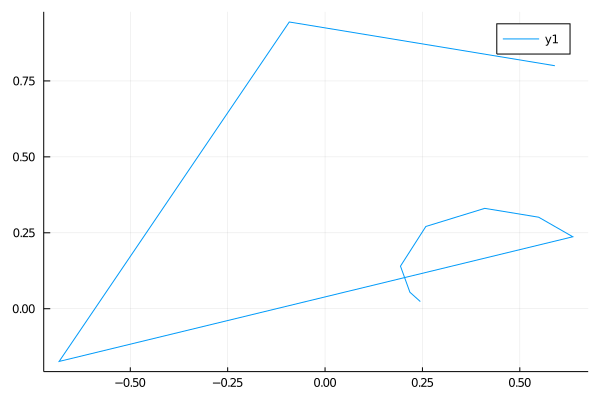

In [84]:
z0 = .8 + .5im
c = .2

data = [f_n(n,z0,c) for n in 1:10]
plot(real.(data), imag.(data))

In [15]:
using Plots

function make_cvals(r_min,i_min,r_max,i_max,grid_size)
    return [((i/grid_size)*(r_max - r_min) + r_min) + ((j/grid_size)*(i_max - i_min) + i_min)*im for i in 1:grid_size, j in 1:grid_size]
end

function iter_until_escape(zo, c, max_iters)
    fn = f(zo, c)
    iter = 1
    while (abs(fn) <= 2.0 && iter < max_iters) 
        fn = f(fn, c)
        iter+=1
    end 
    return iter
end

function make_mandel_escape_map(r_range, i_range, grid_size, max_iters)
    c_vals = make_cvals(r_range[1], i_range[1], r_range[2], i_range[2], grid_size)
    e_map = zeros(Float64, grid_size,grid_size)
    Base.Threads.@threads for i in 1:grid_size
        for j in 1:grid_size
            e_map[i,j] = iter_until_escape(complex(0.0), c_vals[i,j], max_iters)
        end
    end
    return e_map, c_vals
end

function make_julia_escape_map(c, r_range, i_range, grid_size, max_iters)
    z_vals = make_cvals(r_range[1], i_range[1], r_range[2], i_range[2], grid_size)
    e_map = zeros(Float64, grid_size,grid_size)
    Base.Threads.@threads for i in 1:grid_size
        for j in 1:grid_size
            e_map[i,j] = iter_until_escape(z_vals[i,j], c, max_iters)
        end
    end
    return e_map, z_vals
end

make_julia_escape_map (generic function with 1 method)

In [19]:
grid_size = 500
max_iters = 1000

  0.149463 seconds (144 allocations: 5.740 MiB)
  0.003881 seconds (4.46 k allocations: 4.095 MiB)


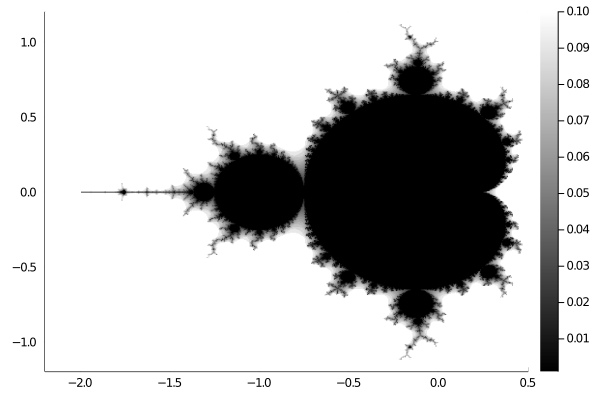

In [26]:
r_range = [-2.2, .5 ]
i_range = [-1.2, 1.2] 

@time m_map, c_vals = make_mandel_escape_map(r_range, i_range, grid_size, max_iters);
@time heatmap(real.(c_vals[:,1]), imag.(c_vals[1,:]), clamp.((1 ./ m_map'), 0,.1), color=:gist_gray)

  0.139789 seconds (142 allocations: 5.739 MiB)
  0.004033 seconds (4.46 k allocations: 4.095 MiB)


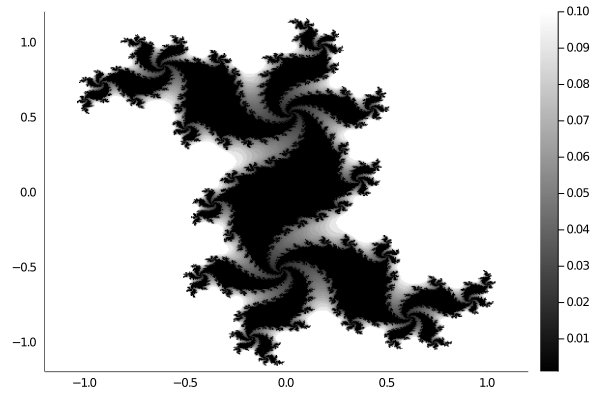

In [78]:
c = complex(.3 + .5im)
r_range = [-1.2, 1.2 ]
i_range = [-1.2, 1.2] 

@time j_map, z_vals = make_julia_escape_map(c, r_range, i_range, grid_size, max_iters);
@time heatmap(real.(z_vals[:,1]), imag.(z_vals[1,:]), clamp.((1 ./ j_map'), 0,.1), color=:gist_gray)

We can speed this up, wiki provides us with the following estimate for the distance of 

$$ b=\lim _{n\to \infty }2\cdot {\frac {|{P_{c}^{n}(c)|\cdot \ln |{P_{c}^{n}(c)}}|}{|{\frac {\partial }{\partial {c}}}P_{c}^{n}(c)|}} $$

In [ ]:
function P(c,n)
    if n == 0
        return c
    end
    return P(c,n-1)^2 + c
end

function dP(c,n)
    if n == 0
        return 1
    end
    return 2*P(c,n-1)*dP(c,n-1) + 1
end
    
function b(c,n)
    return 2 * abs(P(c,n))*log(abs(P(c,n)))/(abs(dP(c,n)))
end

In [ ]:
function make_distance_map(c_vals,grid_size,iters)
    p = zeros(Float64, grid_size,grid_size)
    Base.Threads.@threads for i in 1:grid_size
        for j in 1:grid_size
            dist = b(c_vals[i,j], iters)
            p[i,j] = dist
        end
    end
    return p
end

In [ ]:
@time c_vals = make_cvals(r_min, i_min, r_max, i_max, grid_size);

In [ ]:
@time e_map = make_distance_map(c_vals,grid_size,25);

In [ ]:
@time heatmap(real.(c_vals[:,1]), imag.(c_vals[1,:]), e_map')

In [ ]:
hist = zeros(Int64, max_iters)

for e in e_map
    hist[e] += 1
end

total = sum(hist)
    

In [ ]:
# This sort of works but it's wayyyy to slow

grid_grid_size = 1000
max_iters = 1000;

@manipulate for r_min = -3:0.1:0, r_max = 0:0.1:0.5, i_min = -2:0.1:0, i_max = 0:0.1:1 
    c_vals = make_cvals(r_min, i_min, r_max, i_max, grid_size);
    e_map = make_escape_map(c_vals,grid_size,max_iters);
    heatmap(real.(c_vals[:,1]), imag.(c_vals[1,:]), e_map')
end
